In [2]:
import networkx as nx
import numpy as np
import scipy as sc
import math
import matplotlib.pyplot as plt
import pandas as pd
expander = 0
not_expander = 1
from networkx.drawing.nx_agraph import graphviz_layout
unsure = 2
import seaborn as sns
import scipy
from time import time

In [2]:
# G1 = nx.Graph()
#n_set = G1.nodes; n = len(n_set);
#m_set = G1.edges; m = len(m_set);

In [3]:
#from networkx.algorithms.components.connected import is_connected
def test_expander(G, epsilon):
  # n: number of nodes
  # p: probability that edge exists in G_{n,p} model
  # epsilon: threshold for expander
    n = G.number_of_nodes
#     if not nx.is_connected(G):
#         return not_expander
    Lnorm = nx.normalized_laplacian_matrix(G)
    eigs = np.linalg.eigh(Lnorm.toarray())[0]
    l2 = np.sort(eigs)[1]
    if l2/2 >= epsilon:
        return expander
    elif math.sqrt(2)*l2 < epsilon:
        return not_expander
    else:
        return unsure
    return [l2/2,math.sqrt(2)*l2]
  

Erdos-Renyi graph G is not connected!


In [ ]:
n = 100
G = nx.erdos_renyi_graph(n, p)
epsilon = 0.15
p = (1+epsilon)*np.log2(n)/n
res = test_expander(G,epsilon)
print(res)

0


In [4]:
def expander_counts(graph_dist, params, eps, num_trials=100):
    counts = [0, 0, 0]
    for _ in range(num_trials):
        G = graph_dist(**params)
        isexpander = test_expander(G, eps)
        counts[isexpander] += 1
    return counts

In [ ]:
counts = expander_counts(nx.erdos_renyi_graph, {'n': n, 'p': .02}, epsilon)
print(counts)

[0, 100, 0]


In [ ]:
def plot_counts_hist(counts):
    plt.bar(counts)
    plt.show()

In [39]:
trials = 100
num_points = 50
p_vals = np.linspace(.04, p, num_points)
counts_vals = []

for i in range(len(p_vals)):
    print('round', i, p_vals[i])
    q = p_vals[i]
    counts_vals.append(expander_counts(nx.erdos_renyi_graph, {'n': n, 'p': q}, epsilon, trials)) 

print(counts_vals)

NameError: name 'p' is not defined

Text(0, 0.5, 'proprtion that are expanders')

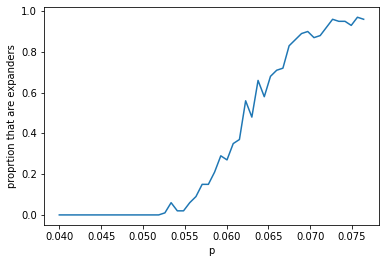

In [ ]:

plt.plot(p_vals, [counts_vals[i][0] / trials for i in range(num_points)])
plt.xlabel('p')
plt.ylabel('proprtion that are expanders')

In [ ]:
n = G.number_of_nodes
Lnorm = nx.normalized_laplacian_matrix(G)
eigs = np.linalg.eigh(Lnorm.toarray())[0]
l2 = np.sort(eigs)[1]

In [ ]:
print(l2)

0.021892269329036457


In [ ]:
fig = plt.figure(figsize=(40, 40)) 
G = nx.fast_gnp_random_graph(300, 0.02, seed=1337) 
nx.draw(G, node_size=30) 
plt.axis('equal') 
plt.show() 
fig.savefig('waka.svg') 

In [62]:
G = nx.waxman_graph(100, alpha=.2, beta=.15, seed=10)
largest_cc = max(nx.connected_components(G), key=len)
S = G.subgraph(largest_cc)
test_expander(S, .1)

2

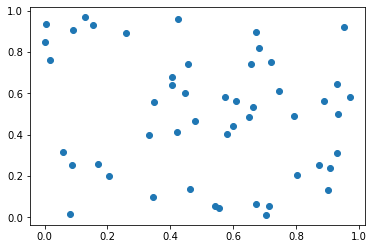

In [40]:
G = nx.waxman_graph(50, alpha=.4, beta=.15)
points = [point for _, point in nx.get_node_attributes(G, 'pos').items()]
X = [point[0] for point in points]
Y = [point[1] for point in points]
plt.scatter(X, Y)
    


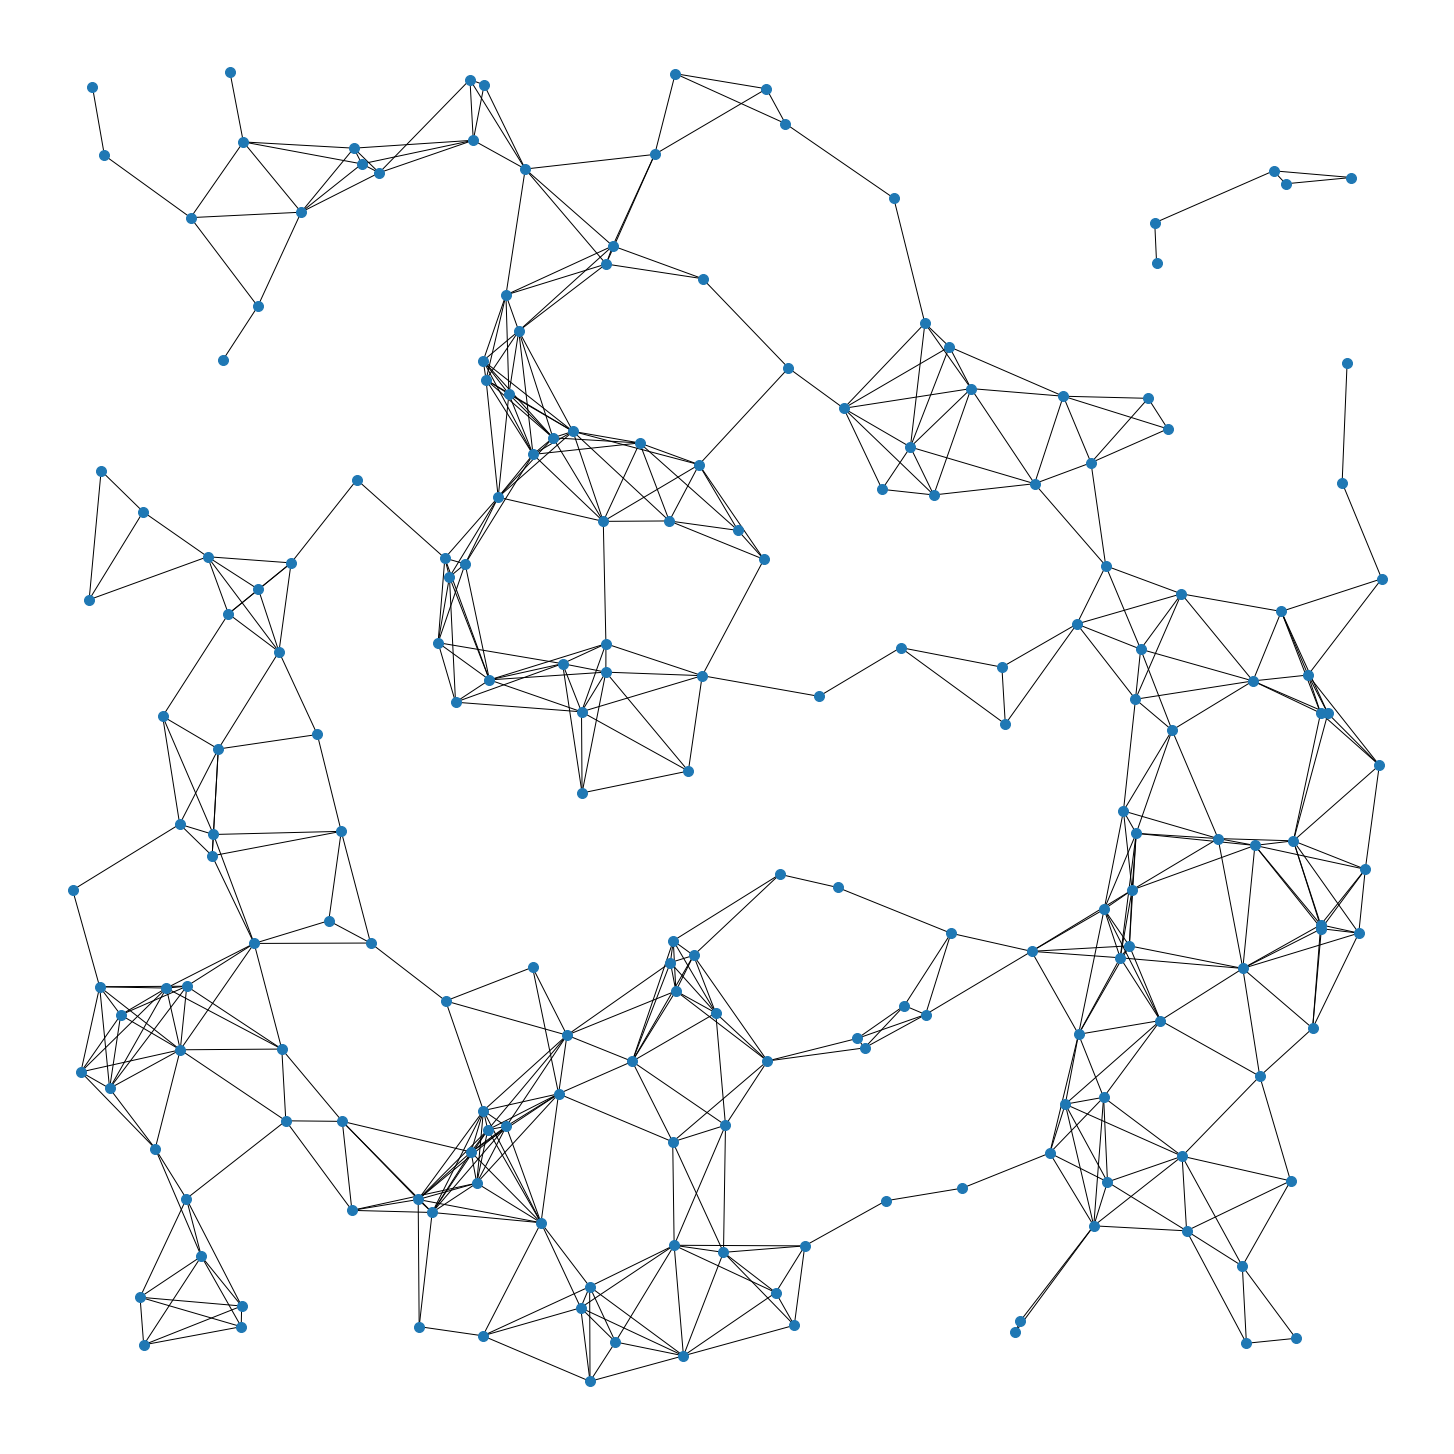

In [11]:
fig = plt.figure(figsize=(20, 20)) 

G = nx.random_geometric_graph(200, radius=.1)
largest_cc = max(nx.connected_components(G), key=len)
S = G.subgraph(largest_cc)
print(S)
# pos = nx.kamada_kawai_layout(G)
# pos = nx.spiral_layout(S)
# pos = graphviz_layout(S, 'neato')
nx.draw(G, pos=nx.get_node_attributes(G, 'pos'), node_size=100)
plt.savefig('graph.pdf')

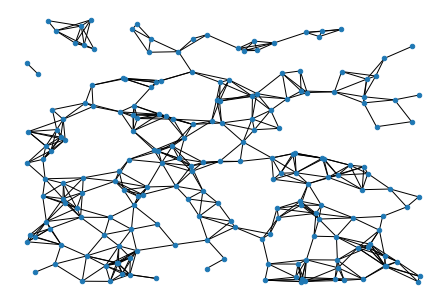

In [9]:
f = plt.figure()
nx.draw(G, pos=nx.get_node_attributes(G, 'pos'), node_size=20)
f.savefig("graph.pdf", pos=nx.get_node_attributes(G, 'pos'))

In [63]:
def run_trials(graph_dist, params, eps_range, trials=100):
    num_points = len(eps_range)
    
    counts_vals = []
    
    for eps_i in range(num_points):
        eps = eps_range[eps_i]
        print('round', eps_i, 'eps', eps)
        expander_hist = expander_counts(graph_dist, params, eps, num_trials=trials)
#         print('time', (t-time())*1000)
        counts_vals.append(expander_hist)
    return counts_vals

In [121]:
n = 300
epses = np.linspace(.00001, .5, 100)
def largest_cc_waxman(n, alpha=.2, beta=.15): 
    G = nx.waxman_graph(n, alpha, beta)
    largest_cc = max(nx.connected_components(G), key=len)
    return G.subgraph(largest_cc)
    
counts = run_trials(largest_cc_waxman, {'n':n}, epses, 600)

round 0 eps 1e-05
round 1 eps 0.00506040404040404
round 2 eps 0.01011080808080808
round 3 eps 0.01516121212121212
round 4 eps 0.02021161616161616
round 5 eps 0.0252620202020202
round 6 eps 0.03031242424242424
round 7 eps 0.03536282828282828
round 8 eps 0.04041323232323232
round 9 eps 0.045463636363636366
round 10 eps 0.0505140404040404
round 11 eps 0.055564444444444444
round 12 eps 0.06061484848484849
round 13 eps 0.06566525252525252
round 14 eps 0.07071565656565655
round 15 eps 0.0757660606060606
round 16 eps 0.08081646464646464
round 17 eps 0.08586686868686867
round 18 eps 0.09091727272727272
round 19 eps 0.09596767676767676
round 20 eps 0.10101808080808079
round 21 eps 0.10606848484848484
round 22 eps 0.11111888888888888
round 23 eps 0.11616929292929291
round 24 eps 0.12121969696969696
round 25 eps 0.126270101010101
round 26 eps 0.13132050505050505
round 27 eps 0.1363709090909091
round 28 eps 0.14142131313131312
round 29 eps 0.14647171717171717
round 30 eps 0.15152212121212122
round

In [122]:
def plot_counts(counts, rounds, name='fig.pdf'):
    fig, ax = plt.subplots()
    clrs = sns.color_palette("husl", 1)
    with sns.axes_style("darkgrid"):
        succ = np.array([count[0] for count in counts])
    #     fail = [count[0] for count in counts]
        unsure = np.array([count[2] for count in counts])
        upperbound = (succ + unsure) / rounds
        upperbound = [min(1., v) for v in upperbound]
        lowerbound = (succ - unsure) / rounds
        lowerbound = [max(0., v) for v in lowerbound]
        ax.plot(epses, succ / rounds)
#         plt.plot(epses, upperbound / rounds)
        plt.fill_between(epses, lowerbound , upperbound, alpha=.3)
        plt.xlabel('epsilon')
        plt.ylabel('proprtion of sampled expanders')
        plt.savefig(name)
print(counts)

[[600, 0, 0], [600, 0, 0], [600, 0, 0], [600, 0, 0], [600, 0, 0], [600, 0, 0], [600, 0, 0], [600, 0, 0], [600, 0, 0], [600, 0, 0], [600, 0, 0], [600, 0, 0], [600, 0, 0], [600, 0, 0], [600, 0, 0], [600, 0, 0], [600, 0, 0], [600, 0, 0], [600, 0, 0], [600, 0, 0], [598, 0, 2], [590, 0, 10], [581, 0, 19], [536, 0, 64], [452, 0, 148], [347, 0, 253], [208, 0, 392], [97, 0, 503], [54, 0, 546], [14, 0, 586], [1, 0, 599], [0, 0, 600], [0, 0, 600], [0, 0, 600], [0, 0, 600], [0, 0, 600], [0, 0, 600], [0, 0, 600], [0, 0, 600], [0, 0, 600], [0, 0, 600], [0, 0, 600], [0, 0, 600], [0, 1, 599], [0, 0, 600], [0, 0, 600], [0, 0, 600], [0, 0, 600], [0, 0, 600], [0, 1, 599], [0, 1, 599], [0, 2, 598], [0, 0, 600], [0, 0, 600], [0, 0, 600], [0, 1, 599], [0, 2, 598], [0, 0, 600], [0, 3, 597], [0, 3, 597], [0, 10, 590], [0, 12, 588], [0, 23, 577], [0, 36, 564], [0, 39, 561], [0, 54, 546], [0, 77, 523], [0, 104, 496], [0, 139, 461], [0, 186, 414], [0, 219, 381], [0, 278, 322], [0, 325, 275], [0, 379, 221], [0, 

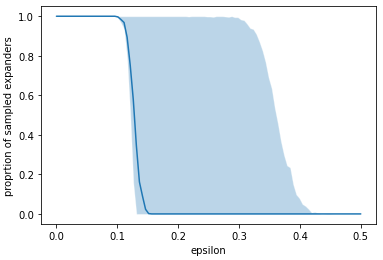

In [124]:
plot_counts(counts, 600)

In [89]:
np.min([1,3], np.array([1,3]))

TypeError: only integer scalar arrays can be converted to a scalar index

In [175]:
graph_data = pd.read_csv("p2p-Gnutella04.txt", delimiter='\t')
G = nx.Graph(zip(graph_data['from'], graph_data['to']))
Lnorm = nx.normalized_laplacian_matrix(G)
eigs = np.linalg.eigh(Lnorm.toarray())[0]
l2 = np.sort(eigs)[1]

### print(l2)